In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

data = []

for i in range(1, 100):  
    url = f'https://www.flipkart.com/search?q=smartphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={i}'
    page = requests.get(url)
    
    if page.status_code == 200:
        print(f'Data fetched successfully for page {i}')
        soup = BeautifulSoup(page.content, 'html.parser')

        product_names = [name.text for name in soup.find_all(attrs={'class': '_4rR01T'})]
        descriptions = [desc.text for desc in soup.find_all(attrs={'class': 'fMghEO'})]
        newprices = [price.text for price in soup.find_all(attrs={'class': '_30jeq3 _1_WHN1'})]
        oldprices = [price.text for price in soup.find_all(attrs={'class': '_3I9_wc _27UcVY'})]
        offers = [offer.text for offer in soup.find_all(attrs={'class': '_3Ay6Sb'})]
        ratings = [rating.text for rating in soup.find_all(attrs={'class': '_2_R_DZ'})]

        for name, desc, newprice, oldprice, offer, rating in zip(product_names, descriptions, newprices, oldprices, offers, ratings):
            data.append([name, desc, newprice, oldprice, offer, rating])
    else:
        print(f'Data is not found for page {i}')

df = pd.DataFrame(data, columns=['product_name', 'description', 'newprices', 'oldprices', 'offers', 'rating'])
df


Data fetched successfully for page 1
Data is not found for page 2
Data fetched successfully for page 3
Data fetched successfully for page 4
Data fetched successfully for page 5
Data fetched successfully for page 6
Data fetched successfully for page 7
Data fetched successfully for page 8
Data fetched successfully for page 9
Data fetched successfully for page 10
Data fetched successfully for page 11
Data fetched successfully for page 12
Data fetched successfully for page 13
Data fetched successfully for page 14
Data fetched successfully for page 15
Data fetched successfully for page 16
Data fetched successfully for page 17
Data fetched successfully for page 18
Data fetched successfully for page 19
Data fetched successfully for page 20
Data fetched successfully for page 21
Data fetched successfully for page 22
Data fetched successfully for page 23
Data fetched successfully for page 24
Data fetched successfully for page 25
Data fetched successfully for page 26
Data fetched successfully for

,product_name,description,newprices,oldprices,offers,rating
0,"Motorola G34 5G (Ocean Green, 128 GB)",8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"₹11,999","₹14,999",20% off,"24,781 Ratings & 2,749 Reviews"
1,"POCO C55 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,"₹5,999","₹11,999",50% off,"1,14,405 Ratings & 7,129 Reviews"
2,"Motorola G34 5G (Ice Blue, 128 GB)",8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"₹11,999","₹14,999",20% off,"24,781 Ratings & 2,749 Reviews"
3,POCO C51 - Locked with Airtel Prepaid (Royal B...,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,"₹4,999","₹9,999",50% off,"1,99,709 Ratings & 11,246 Reviews"
4,"MOTOROLA g24 Power (Ink blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹7,999","₹11,999",33% off,"2,509 Ratings & 280 Reviews"
...,...,...,...,...,...,...
918,"SAMSUNG Galaxy A15 5G (Blue, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,"₹99,999","₹16,999",24% off,"3,156 Ratings & 335 Reviews"
919,"SAMSUNG Galaxy S23 Ultra 5G (Phantom Black, 25...",12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Quad...,"₹12,790","₹12,999",39% off,"1,716 Ratings & 107 Reviews"
920,"SAMSUNG GALAXY M13 5G (?Stardust Brown, 128 GB)",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,"₹7,899","₹48,999",6% off,153 Ratings & 18 Reviews
921,"Nokia C21 Plus (Dark Cyan, 64 GB)",4 GB RAM | 64 GB ROM16.69 cm (6.57 inch) HD+ D...,"₹45,999","₹15,999",20% off,"6,819 Ratings & 417 Reviews"


In [2]:
def convert_rating(rating):
    if isinstance(rating, int):
        return rating  # If already an integer, return as it is
    else:
        rating_str = rating.split()[0]  # Extract the numerical part before "Ratings"
        rating_str = rating_str.replace(',', '')  # Remove commas if present
        return int(rating_str)

df['rating'] = df['rating'].apply(lambda x: convert_rating(x))
is_integers = all(isinstance(val, int) for val in df['rating'])
print(is_integers)
df

True


,product_name,description,newprices,oldprices,offers,rating
0,"Motorola G34 5G (Ocean Green, 128 GB)",8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"₹11,999","₹14,999",20% off,24781
1,"POCO C55 (Power Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,"₹5,999","₹11,999",50% off,114405
2,"Motorola G34 5G (Ice Blue, 128 GB)",8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ D...,"₹11,999","₹14,999",20% off,24781
3,POCO C51 - Locked with Airtel Prepaid (Royal B...,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,"₹4,999","₹9,999",50% off,199709
4,"MOTOROLA g24 Power (Ink blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹7,999","₹11,999",33% off,2509
...,...,...,...,...,...,...
918,"SAMSUNG Galaxy A15 5G (Blue, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,"₹99,999","₹16,999",24% off,3156
919,"SAMSUNG Galaxy S23 Ultra 5G (Phantom Black, 25...",12 GB RAM | 256 GB ROM17.27 cm (6.8 inch) Quad...,"₹12,790","₹12,999",39% off,1716
920,"SAMSUNG GALAXY M13 5G (?Stardust Brown, 128 GB)",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,"₹7,899","₹48,999",6% off,153
921,"Nokia C21 Plus (Dark Cyan, 64 GB)",4 GB RAM | 64 GB ROM16.69 cm (6.57 inch) HD+ D...,"₹45,999","₹15,999",20% off,6819


In [3]:
df1=df.drop(['description','product_name'],axis='columns')
df1.head()

,newprices,oldprices,offers,rating
0,"₹11,999","₹14,999",20% off,24781
1,"₹5,999","₹11,999",50% off,114405
2,"₹11,999","₹14,999",20% off,24781
3,"₹4,999","₹9,999",50% off,199709
4,"₹7,999","₹11,999",33% off,2509


In [4]:
df1.describe()

,rating
count,923.000000
mean,31481.763814
std,69699.335073
min,3.000000
25%,664.000000
50%,4049.000000
75%,21843.000000
max,487492.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   newprices  923 non-null    object
 1   oldprices  923 non-null    object
 2   offers     923 non-null    object
 3   rating     923 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 29.0+ KB


In [6]:
df1.isnull().sum()

newprices    0
oldprices    0
offers       0
rating       0
dtype: int64

In [7]:
df1.nunique()

newprices    338
oldprices    119
offers        52
rating       358
dtype: int64

In [ ]:
df1.drop_duplicates()

In [8]:
df1.corr()

C:\Users\91934\AppData\Local\Temp\ipykernel_18904\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,rating
rating,1.0


In [9]:
import seaborn as sns

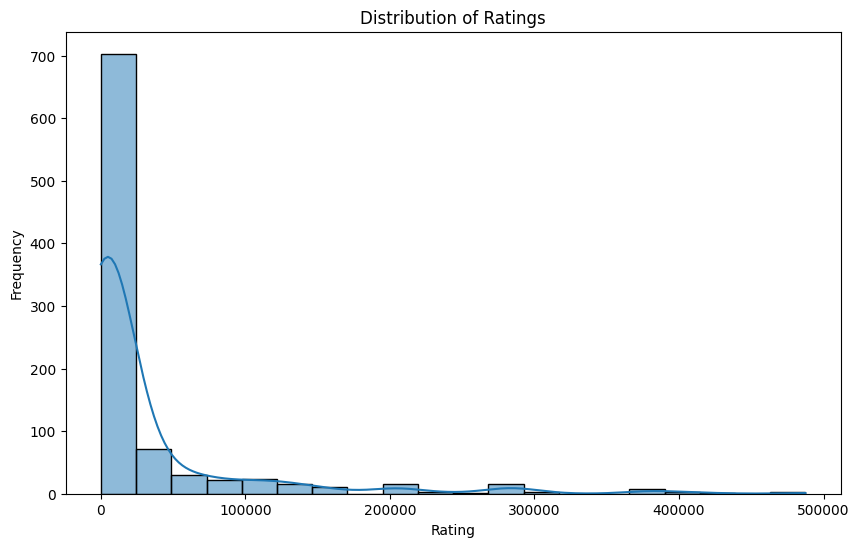

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df1['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating') 
plt.ylabel('Frequency')  
plt.show()

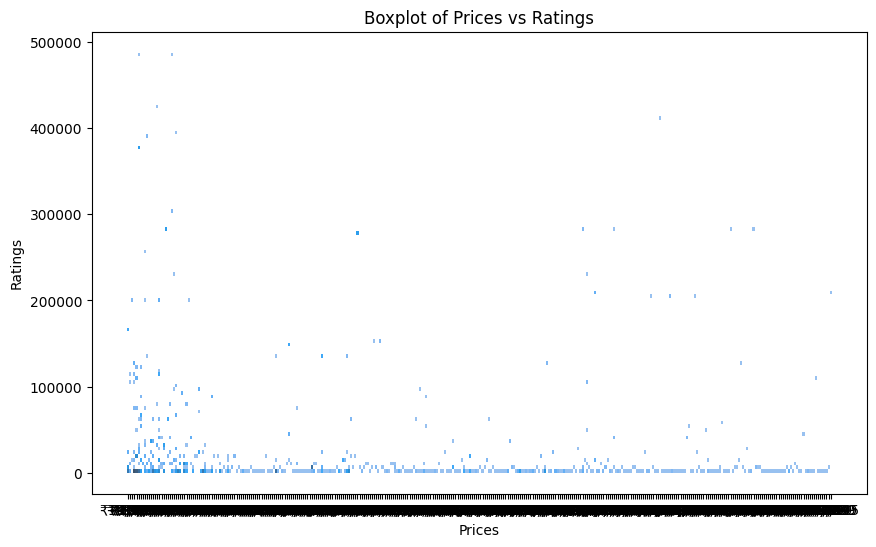

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(x='newprices', y='rating', data=df)
plt.title('Boxplot of Prices vs Ratings')
plt.xlabel('Prices')
plt.ylabel('Ratings')
plt.show()

C:\Users\91934\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


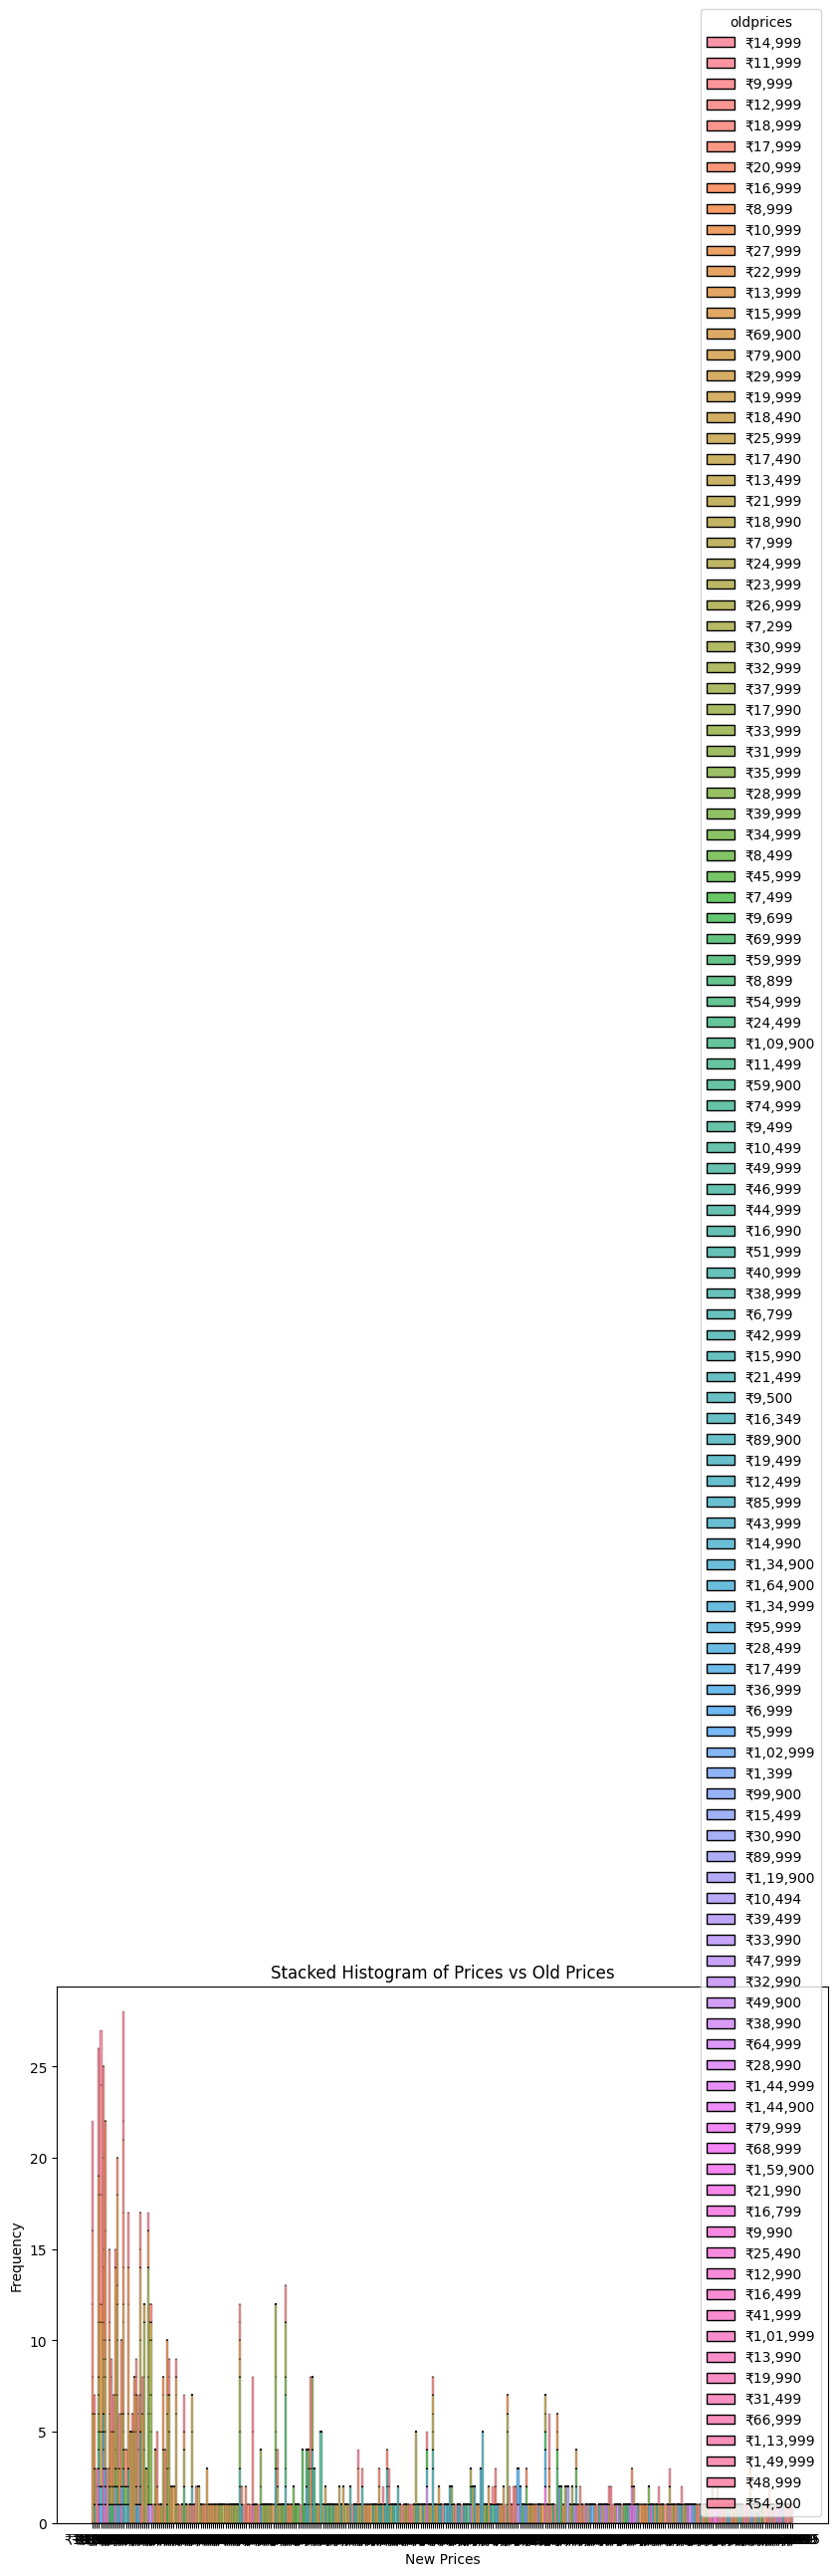

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.histplot(data=df1, x='newprices', hue='oldprices', multiple='stack')
plt.title('Stacked Histogram of Prices vs Old Prices')
plt.xlabel('New Prices')
plt.ylabel('Frequency')
plt.show()


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

data = []

for i in range(1, 100):  
    url = f'https://www.flipkart.com/search?q=smartphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={i}'
    page = requests.get(url)
    
    if page.status_code == 200:
        print(f'Data fetched successfully for page {i}')
        soup = BeautifulSoup(page.content, 'html.parser')

        product_names = [name.text for name in soup.find_all(attrs={'class': '_4rR01T'})]
        descriptions = [desc.text for desc in soup.find_all(attrs={'class': 'fMghEO'})]
        newprices = [price.text for price in soup.find_all(attrs={'class': '_30jeq3 _1_WHN1'})]
        oldprices = [price.text for price in soup.find_all(attrs={'class': '_3I9_wc _27UcVY'})]
        offers = [offer.text for offer in soup.find_all(attrs={'class': '_3Ay6Sb'})]
        ratings = [rating.text for rating in soup.find_all(attrs={'class': '_2_R_DZ'})]

        for name, desc, newprice, oldprice, offer, rating in zip(product_names, descriptions, newprices, oldprices, offers, ratings):
            data.append([name, desc, newprice, oldprice, offer, rating])
    else:
        print(f'Data is not found for page {i}')

df = pd.DataFrame(data, columns=['product_name', 'description', 'newprices', 'oldprices', 'offers', 'rating'])
df


Data fetched successfully for page 1
Data fetched successfully for page 2
Data fetched successfully for page 3
Data fetched successfully for page 4
Data fetched successfully for page 5
Data fetched successfully for page 6
Data fetched successfully for page 7
Data fetched successfully for page 8
Data fetched successfully for page 9
Data fetched successfully for page 10
Data fetched successfully for page 11
Data fetched successfully for page 12
Data fetched successfully for page 13
Data fetched successfully for page 14
Data fetched successfully for page 15
Data fetched successfully for page 16
Data fetched successfully for page 17
Data fetched successfully for page 18
Data fetched successfully for page 19
Data fetched successfully for page 20
Data fetched successfully for page 21
Data fetched successfully for page 22
Data fetched successfully for page 23
Data fetched successfully for page 24
Data fetched successfully for page 25
Data fetched successfully for page 26
Data fetched successf

,product_name,description,newprices,oldprices,offers,rating
0,"vivo T2x 5G (Marine Blue, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,"3,76,214 Ratings & 21,218 Reviews"
1,"vivo T2x 5G (Glimmer Black, 128 GB)",4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹11,999","₹17,999",33% off,"1,64,291 Ratings & 8,795 Reviews"
2,"vivo T2x 5G (Aurora Gold, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,"3,76,214 Ratings & 21,218 Reviews"
3,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,"3,76,214 Ratings & 21,218 Reviews"
4,"vivo T2x 5G (Sunstone Orange, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,"3,76,214 Ratings & 21,218 Reviews"
...,...,...,...,...,...,...
940,Infinix Note 11s Free Fire Edition (Mithril Gr...,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,"₹15,999","₹18,999",15% off,"8,503 Ratings & 1,058 Reviews"
941,Infinix Note 11s Free Fire Edition (Haze Green...,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,"₹15,999","₹1,44,999",3% off,"8,503 Ratings & 1,058 Reviews"
942,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Violet, ...",12 GB RAM | 512 GB ROM17.27 cm (6.8 inch) Quad...,"₹1,39,999","₹16,999",33% off,"1,198 Ratings & 190 Reviews"
943,"SAMSUNG GALAXY M13 5G (Midnight Blue, 64 GB)",4 GB RAM | 64 GB ROM16.51 cm (6.5 inch) Displa...,"₹11,299","₹19,990",22% off,"1,712 Ratings & 96 Reviews"


In [3]:
def convert_rating(rating):
    if isinstance(rating, int):
        return rating  # If already an integer, return as it is
    else:
        rating_str = rating.split()[0]  # Extract the numerical part before "Ratings"
        rating_str = rating_str.replace(',', '')  # Remove commas if present
        return int(rating_str)

df['rating'] = df['rating'].apply(lambda x: convert_rating(x))
is_integers = all(isinstance(val, int) for val in df['rating'])
print(is_integers)
df

True


,product_name,description,newprices,oldprices,offers,rating
0,"vivo T2x 5G (Marine Blue, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,376214
1,"vivo T2x 5G (Glimmer Black, 128 GB)",4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹11,999","₹17,999",33% off,164291
2,"vivo T2x 5G (Aurora Gold, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,376214
3,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,376214
4,"vivo T2x 5G (Sunstone Orange, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off,376214
...,...,...,...,...,...,...
940,Infinix Note 11s Free Fire Edition (Mithril Gr...,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,"₹15,999","₹18,999",15% off,8503
941,Infinix Note 11s Free Fire Edition (Haze Green...,8 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,"₹15,999","₹1,44,999",3% off,8503
942,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Violet, ...",12 GB RAM | 512 GB ROM17.27 cm (6.8 inch) Quad...,"₹1,39,999","₹16,999",33% off,1198
943,"SAMSUNG GALAXY M13 5G (Midnight Blue, 64 GB)",4 GB RAM | 64 GB ROM16.51 cm (6.5 inch) Displa...,"₹11,299","₹19,990",22% off,1712


In [57]:
target=df.rating
inputs=df.drop('rating',axis='columns')
inputs.head()


,product_name,description,newprices,oldprices,offers
0,"vivo T2x 5G (Marine Blue, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off
1,"vivo T2x 5G (Glimmer Black, 128 GB)",4 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹11,999","₹17,999",33% off
2,"vivo T2x 5G (Aurora Gold, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off
3,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off
4,"vivo T2x 5G (Sunstone Orange, 128 GB)",6 GB RAM | 128 GB ROM16.71 cm (6.58 inch) Full...,"₹12,999","₹18,999",31% off


In [58]:
df1=inputs.drop(['description','product_name'],axis='columns')
df1.head()

,newprices,oldprices,offers
0,"₹12,999","₹18,999",31% off
1,"₹11,999","₹17,999",33% off
2,"₹12,999","₹18,999",31% off
3,"₹12,999","₹18,999",31% off
4,"₹12,999","₹18,999",31% off


In [60]:
df1['offers']=(inputs['offers'].str.replace('off', '').str.replace(r'\D', '', regex=True).astype(int)) % 100
df1

,newprices,oldprices,offers
0,"₹12,999","₹18,999",31
1,"₹11,999","₹17,999",33
2,"₹12,999","₹18,999",31
3,"₹12,999","₹18,999",31
4,"₹12,999","₹18,999",31
...,...,...,...
940,"₹15,999","₹18,999",15
941,"₹15,999","₹1,44,999",3
942,"₹1,39,999","₹16,999",33
943,"₹11,299","₹19,990",22


In [61]:


def convert_price(price):
    if isinstance(price, int):
        return price  
    else:
        return int(price.replace('₹', '').replace(',', ''))


df1['newprices'] = df1['newprices'].apply(lambda x: convert_price(x))
df1['oldprices'] = df1['oldprices'].apply(lambda x: convert_price(x))


df1



,newprices,oldprices,offers
0,12999,18999,31
1,11999,17999,33
2,12999,18999,31
3,12999,18999,31
4,12999,18999,31
...,...,...,...
940,15999,18999,15
941,15999,144999,3
942,139999,16999,33
943,11299,19990,22


In [62]:
df1.describe()

,newprices,oldprices,offers
count,945.00,945.00,945.00
mean,21284.56,26392.49,23.87
std,22528.68,24525.64,11.10
min,994.00,1399.00,1.00
25%,8499.00,11999.00,16.00
50%,12999.00,17999.00,23.00
75%,24381.00,28999.00,32.00
max,158990.00,164900.00,58.00


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,target, test_size=0.2)

In [64]:
len(x_test)

189

In [65]:
len(x_train)

756

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [67]:
model.fit(x_test,y_test)

LinearRegression()

In [68]:
model.score(x_test,y_test)

0.01732586275732373

In [69]:
model.predict(x_test[:10])

array([32579.58563598, 34158.23759867, 43435.46337143, 27399.90354351,
       34592.78184453, 27711.41163572, 28991.73413457, 25204.23448298,
       28776.39071824, 34168.38635875])

In [70]:
y_pred = model.predict(x_test)
y_pred

array([32579.58563598, 34158.23759867, 43435.46337143, 27399.90354351,
       34592.78184453, 27711.41163572, 28991.73413457, 25204.23448298,
       28776.39071824, 34168.38635875, 31099.69278665, 24450.18152825,
       36751.27901257, 25118.93627919, 27186.00170272, 29362.73957511,
       27116.85326489, 24756.12627637, 25918.03230392, 31206.55067685,
       25411.95591305, 27711.41163572, 20831.55946443, 32713.67049454,
       32420.32379231, 21129.4647988 , 28626.82979039, 37014.27583249,
       29885.9196712 , 27720.68617108, 28555.70758804, 27966.2799741 ,
       27958.40210782, 29955.67119668, 51589.64184542, 34469.7365809 ,
       33512.06216259, 23115.42951938, 30307.35688167, 27705.39237225,
       29251.80614511, 26204.29181804, 26676.10742543, 29812.3364727 ,
       21418.78481464, 26489.84248686, 27671.10312892, 25805.13121   ,
       29170.95639129, 38143.36091415, 27781.77624552, 21011.45222042,
       48975.04775626, 77591.15887366, 24005.28457371,  5984.85527265,
      

In [71]:

y_pred = model.predict(x_test)


from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


Mean Squared Error: 4058573028.6216125
R² score: 0.01732586275732373


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

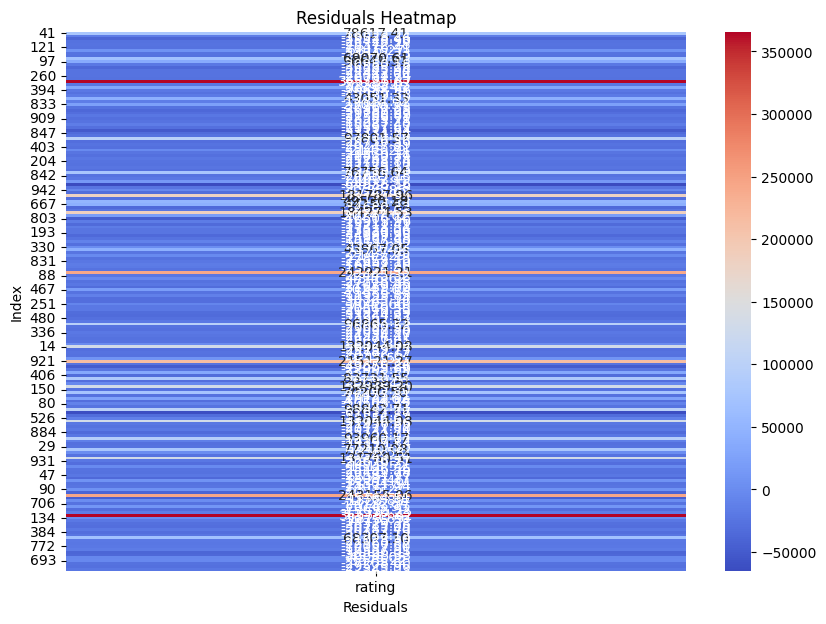

In [73]:



residuals = y_test - y_pred


plt.figure(figsize=(10, 7))
sns.heatmap(residuals.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Residuals Heatmap')
plt.xlabel('Residuals')
plt.ylabel('Index')
plt.show()


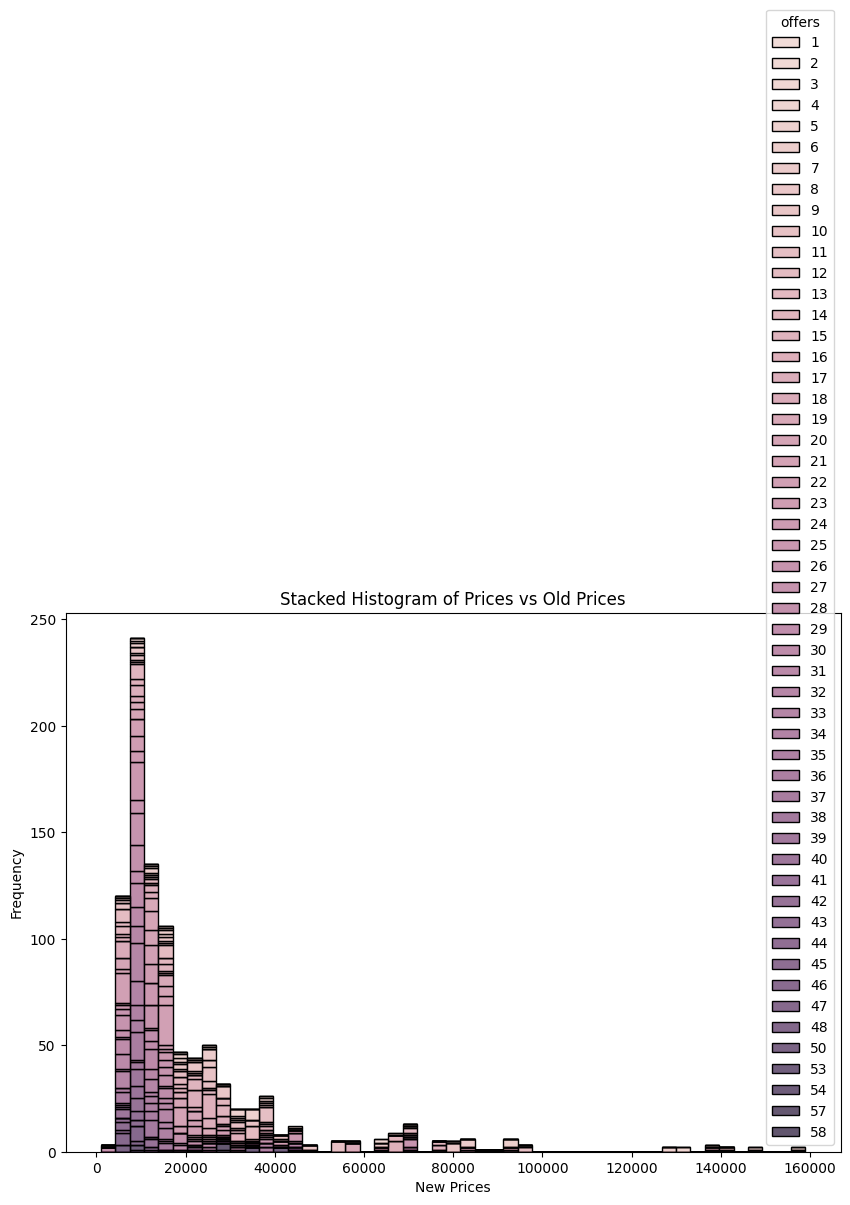

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.histplot(data=df1, x='newprices', hue='offers', multiple='stack')
plt.title('Stacked Histogram of Prices vs Old Prices')
plt.xlabel('New Prices')
plt.ylabel('Frequency')
plt.show()

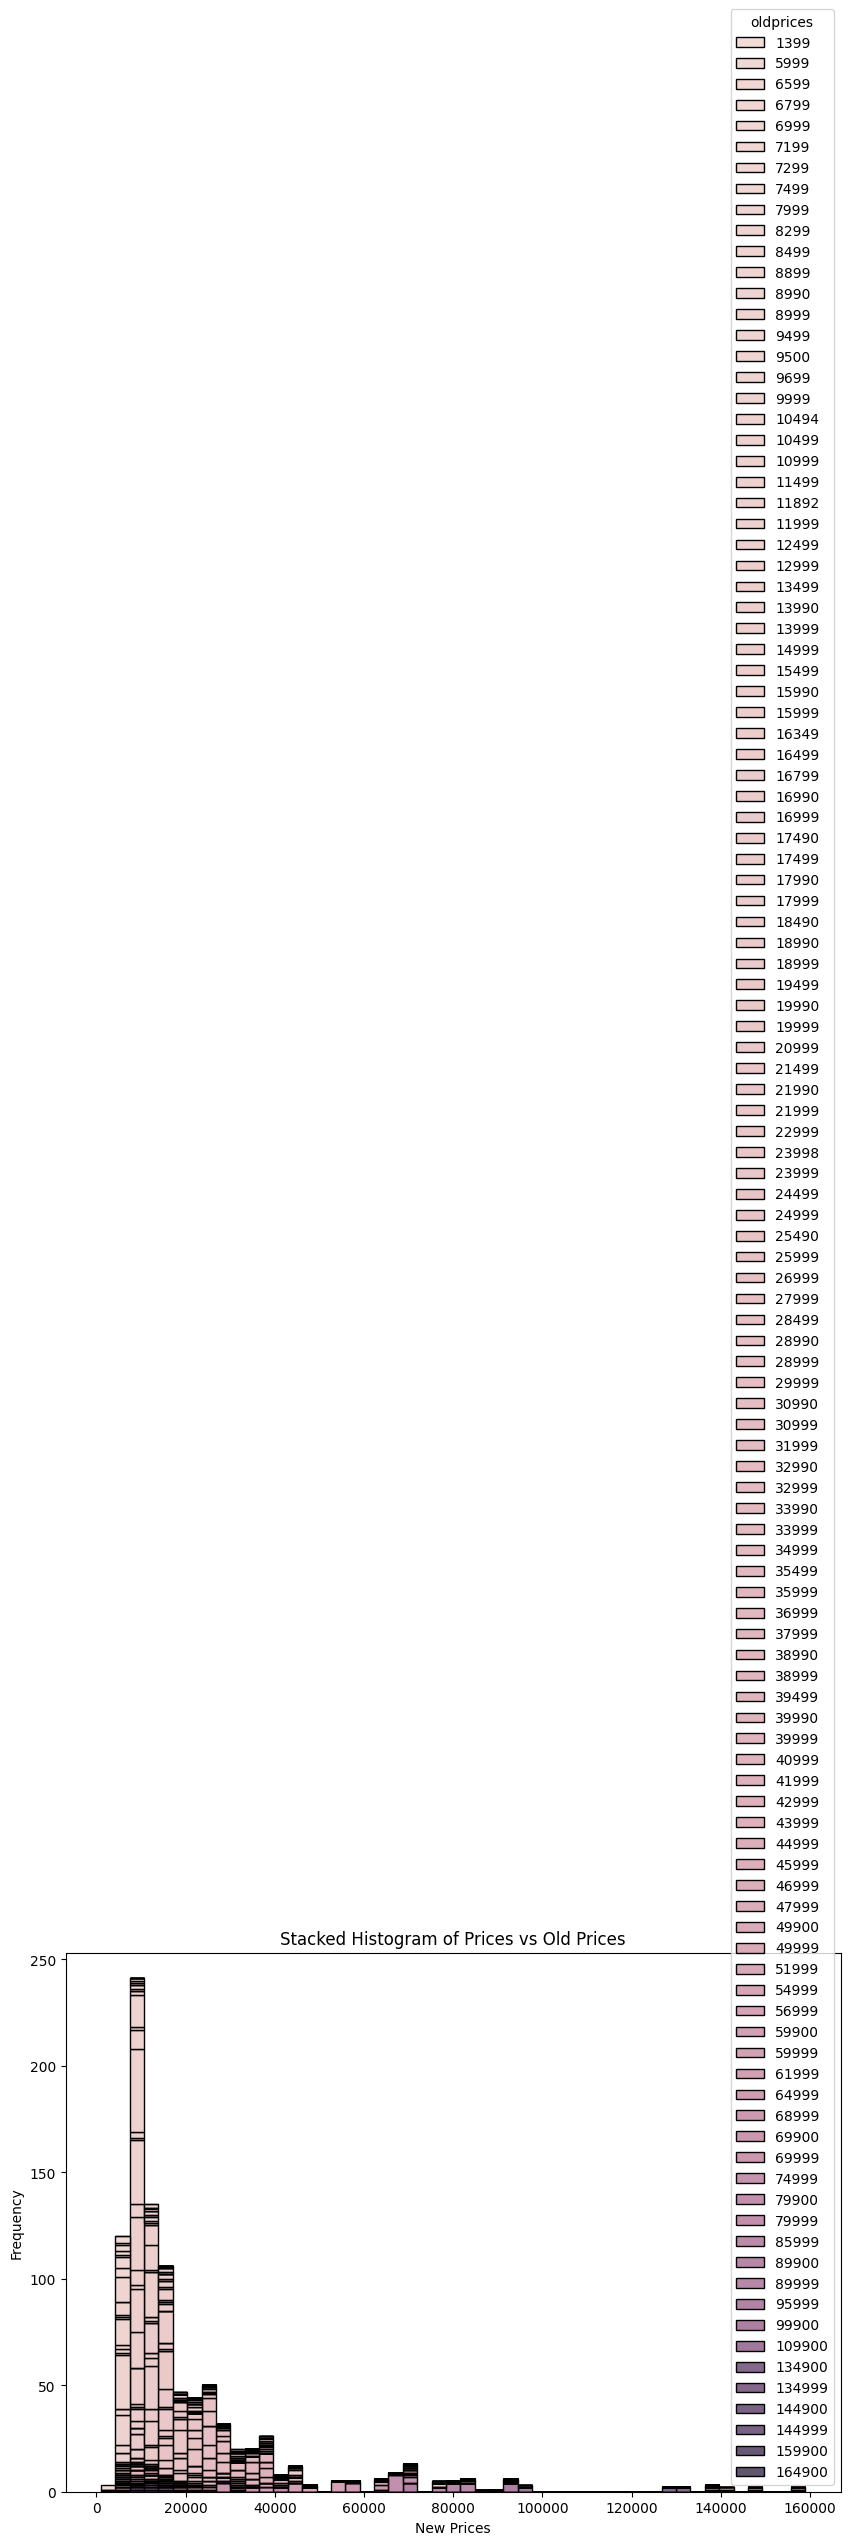

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.histplot(data=df1, x='newprices', hue='oldprices', multiple='stack')
plt.title('Stacked Histogram of Prices vs Old Prices')
plt.xlabel('New Prices')
plt.ylabel('Frequency')
plt.show()